In [2]:
!pip install tweepy

     ---------------------------------------- 0.0/98.5 kB ? eta -:--:--
     ---------------------------------------- 98.5/98.5 kB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/151.7 kB ? eta -:--:--
     -------------------------------------- 151.7/151.7 kB 8.8 MB/s eta 0:00:00


In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load data from the single CSV file
data = pd.read_csv('data/twitter.csv')
data.head()


,Id,Tweet,following,followers,actions,is_retweet,location,Type,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,10091,It's the everything else that's complicated. #...,0,11500,NaN,0,Chicago,NotSpam,NaN,NaN,NaN,NaN
1,10172,Eren sent a glare towards Mikasa then nodded a...,0,0,NaN,0,NaN,NotSpam,NaN,NaN,NaN,NaN
2,7012,I posted a new photo to Facebook http://fb.me/...,0,0,NaN,0,"Scotland, U.K",NotSpam,NaN,NaN,NaN,NaN
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319,611,294,0,"Atlanta, Ga",Spam,NaN,NaN,NaN,NaN
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840,1724,1522,0,Blumberg,Spam,NaN,NaN,NaN,NaN


Classifier: RandomForestClassifier
Accuracy: 0.9009197324414716
Precision (Spam): 0.9050332757740867
Recall (Spam): 0.9116866256697953
F1 Score (Spam): 0.9073388488143262


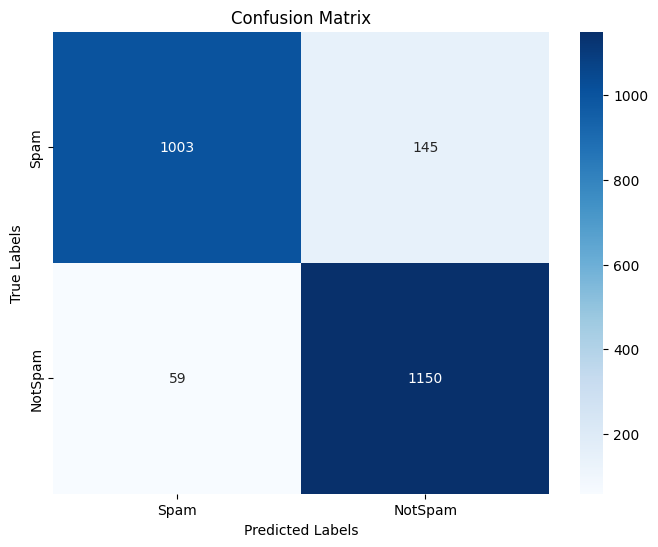

Classifier: SVC
Accuracy: 0.9021739130434783
Precision (Spam): 0.9055327793324204
Recall (Spam): 0.9128212320638689
F1 Score (Spam): 0.9076624242186636


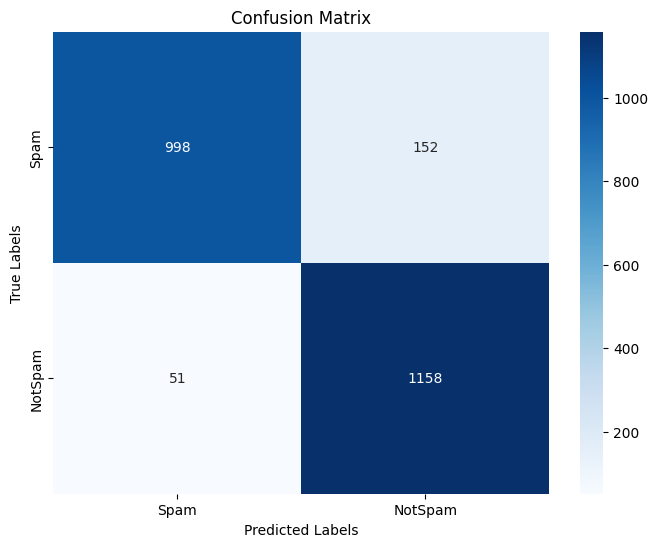

Classifier: GradientBoostingClassifier
Accuracy: 0.8850334448160535
Precision (Spam): 0.9028718703976436
Recall (Spam): 0.8940935735606143
F1 Score (Spam): 0.8928466050030013


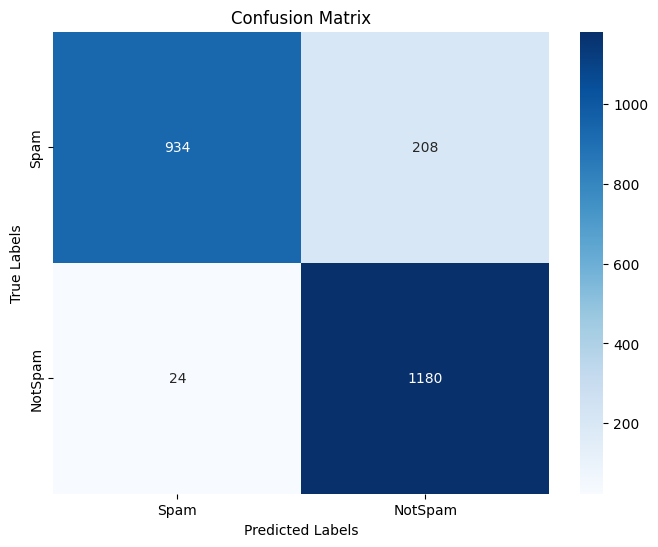

Classifier: VotingClassifier
Accuracy: 0.9051003344481605
Precision (Spam): 0.9119971703707201
Recall (Spam): 0.9155040097817095
F1 Score (Spam): 0.9113588433159877


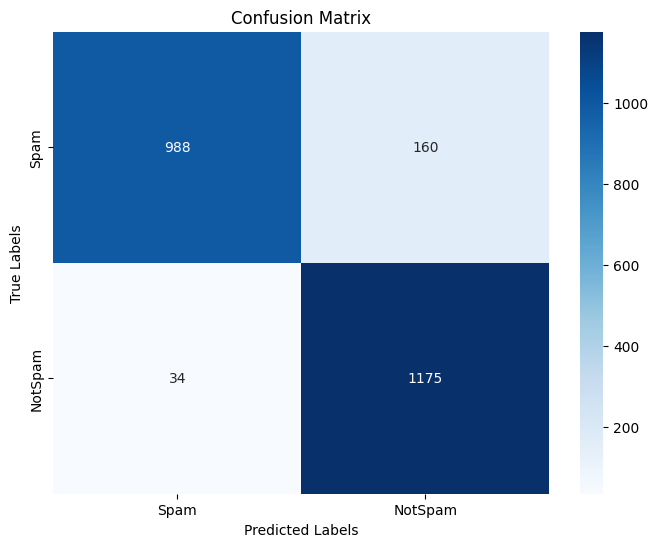

In [19]:
# Preprocessing: Filter columns and clean data as needed
data = data[['Tweet', 'Type']].dropna()

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(data['Tweet'].values)
y = data['Type'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers and ensembles
random_forest = RandomForestClassifier()
svm = SVC()
gradient_boosting = GradientBoostingClassifier()
ensemble_classifier = VotingClassifier(estimators=[
    ('Random Forest', random_forest),
    ('SVM', svm),
    ('Gradient Boosting', gradient_boosting)
], voting='hard')

# Train each classifier and ensemble
classifiers = [random_forest, svm, gradient_boosting, ensemble_classifier]

for classifier in classifiers:
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro', labels=['Spam', 'NotSpam'])
    recall = recall_score(y_test, predictions, average='macro', labels=['Spam', 'NotSpam'])
    f1 = f1_score(y_test, predictions, average='macro', labels=['Spam', 'NotSpam'])

    # Print results for each classifier
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision (Spam): {precision}")
    print(f"Recall (Spam): {recall}")
    print(f"F1 Score (Spam): {f1}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, predictions, labels=['Spam', 'NotSpam'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Spam', 'NotSpam'], yticklabels=['Spam', 'NotSpam'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    print("=" * 50)